In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
Movie =pd.read_csv(r"C:\Users\Hp\Downloads\Association rules\my_movies.csv")
Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [3]:
Movie.shape

(10, 15)

In [4]:
Movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
movie=Movie.drop(['V1','V2','V3','V4','V5'],axis=1)


In [6]:
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [7]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
movie.skew()

Sixth Sense     -0.484123
Gladiator       -1.035098
LOTR1            1.778781
Harry Potter1    1.778781
Patriot         -0.484123
LOTR2            1.778781
Harry Potter2    3.162278
LOTR             3.162278
Braveheart       3.162278
Green Mile       1.778781
dtype: float64

In [9]:
movie.var()

Sixth Sense      0.266667
Gladiator        0.233333
LOTR1            0.177778
Harry Potter1    0.177778
Patriot          0.266667
LOTR2            0.177778
Harry Potter2    0.100000
LOTR             0.100000
Braveheart       0.100000
Green Mile       0.177778
dtype: float64

In [10]:
movie.kurt()

Sixth Sense      -2.276786
Gladiator        -1.224490
LOTR1             1.406250
Harry Potter1     1.406250
Patriot          -2.276786
LOTR2             1.406250
Harry Potter2    10.000000
LOTR             10.000000
Braveheart       10.000000
Green Mile        1.406250
dtype: float64

In [11]:
movie.std()

Sixth Sense      0.516398
Gladiator        0.483046
LOTR1            0.421637
Harry Potter1    0.421637
Patriot          0.516398
LOTR2            0.421637
Harry Potter2    0.316228
LOTR             0.316228
Braveheart       0.316228
Green Mile       0.421637
dtype: float64

In [12]:
movie.mean()

Sixth Sense      0.6
Gladiator        0.7
LOTR1            0.2
Harry Potter1    0.2
Patriot          0.6
LOTR2            0.2
Harry Potter2    0.1
LOTR             0.1
Braveheart       0.1
Green Mile       0.2
dtype: float64

In [13]:
movie.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


# Apriori Algorithm

In [14]:
frequent_itemsets = apriori(movie, min_support=0.1, use_colnames=False)
frequent_itemsets

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.2,(2)
3,0.2,(3)
4,0.6,(4)
5,0.2,(5)
6,0.1,(6)
7,0.1,(7)
8,0.1,(8)
9,0.2,(9)


In [15]:
data= association_rules(frequent_itemsets, metric='lift' ,min_threshold=0.8)
data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(0),(2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(2),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(0),(3),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
242,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [16]:
data[data.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(0),(7),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
241,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
242,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [17]:
data.sort_values('lift',ascending = False)[:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
206,"(9, 2)","(3, 5)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
211,"(3, 5)","(9, 2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
221,"(0, 2, 3)","(9, 5)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
139,"(1, 9)","(0, 7)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
138,"(0, 7)","(1, 9)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
5,(3),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
62,"(2, 5)",(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(0),(3),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(2),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


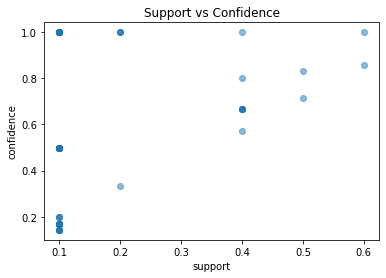

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

plt.scatter(data['support'], data['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()


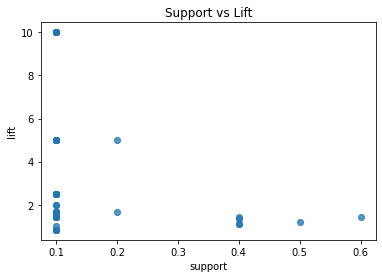

In [19]:
plt.scatter(data['support'], data['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

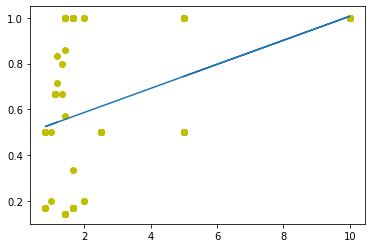

In [20]:
fit = np.polyfit(data['lift'], data['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(data['lift'], data['confidence'], 'yo', data['lift'], 
 fit_fn(data['lift']))

## Support = 0.2

In [21]:
frequent_itemsets1 = apriori(movie, min_support=0.2, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [22]:
data1= association_rules(frequent_itemsets1, metric='lift' ,min_threshold=0.8)
data1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [23]:
data1[data1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


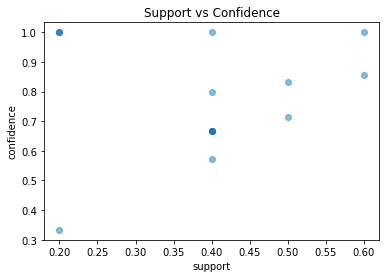

In [24]:
plt.scatter(data1['support'], data1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

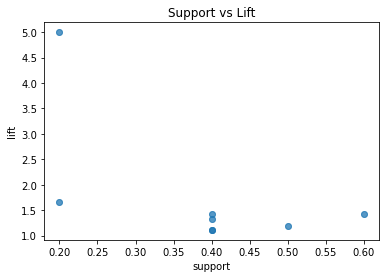

In [25]:
plt.scatter(data1['support'], data1['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

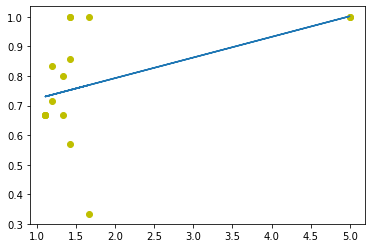

In [26]:
fit = np.polyfit(data1['lift'], data1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(data1['lift'], data1['confidence'], 'yo', data1['lift'], 
 fit_fn(data1['lift']))

## Support = 0.4 

In [27]:
frequent_itemsets2 = apriori(movie, min_support=0.4, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Sixth Sense, Patriot, Gladiator)"


In [28]:
data2= association_rules(frequent_itemsets2, metric='lift' ,min_threshold=0.8)
data2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [29]:
data2[data2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


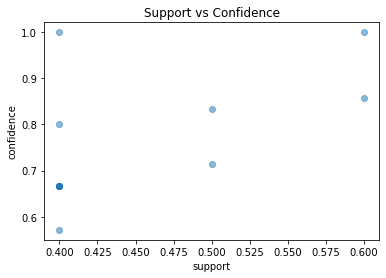

In [30]:
plt.scatter(data2['support'], data2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()


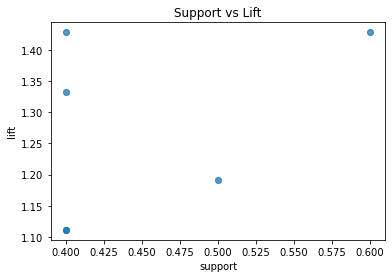

In [31]:
plt.scatter(data2['support'], data2['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

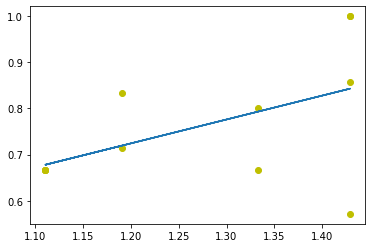

In [32]:
fit = np.polyfit(data2['lift'], data2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(data2['lift'], data2['confidence'], 'yo', data2['lift'], 
 fit_fn(data2['lift']))

## Support = 0.5 

In [33]:
frequent_itemsets3 = apriori(movie, min_support=0.5, use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Patriot, Gladiator)"


In [34]:
data3= association_rules(frequent_itemsets3, metric='lift' ,min_threshold=0.8)
data3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


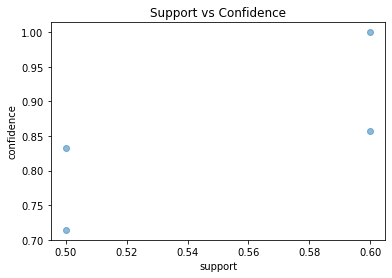

In [35]:
plt.scatter(data3['support'], data3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()


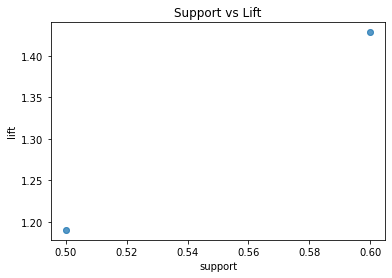

In [36]:
plt.scatter(data3['support'], data3['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

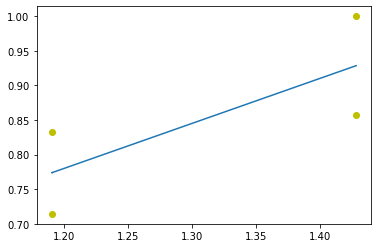

In [37]:
fit = np.polyfit(data3['lift'], data3['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(data3['lift'], data3['confidence'], 'yo', data3['lift'], 
 fit_fn(data3['lift']))

# Visualization of rules using different plots 

C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1128: RuntimeWarning: invalid value encountered in double_scalars
  notch_min = med - 1.57 * iqr / np.sqrt(N)


<AxesSubplot:>

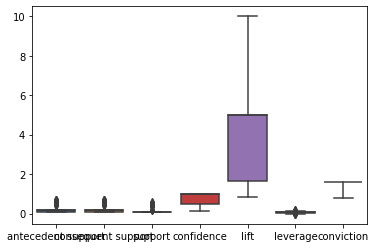

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

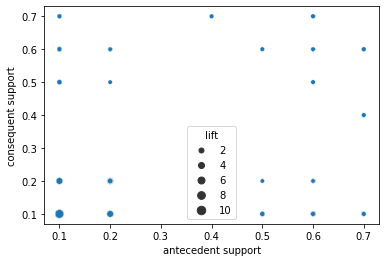

In [39]:
sns.scatterplot(x='antecedent support',y='consequent support',size='lift',data=data)

<AxesSubplot:xlabel='support', ylabel='confidence'>

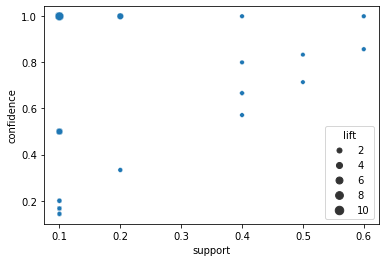

In [40]:
sns.scatterplot(x='support',y='confidence',size='lift',data=data)

<AxesSubplot:xlabel='lift', ylabel='leverage'>

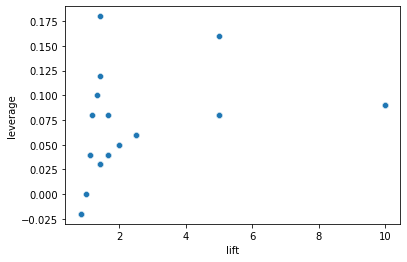

In [41]:
sns.scatterplot(x='lift',y='leverage',data=data)

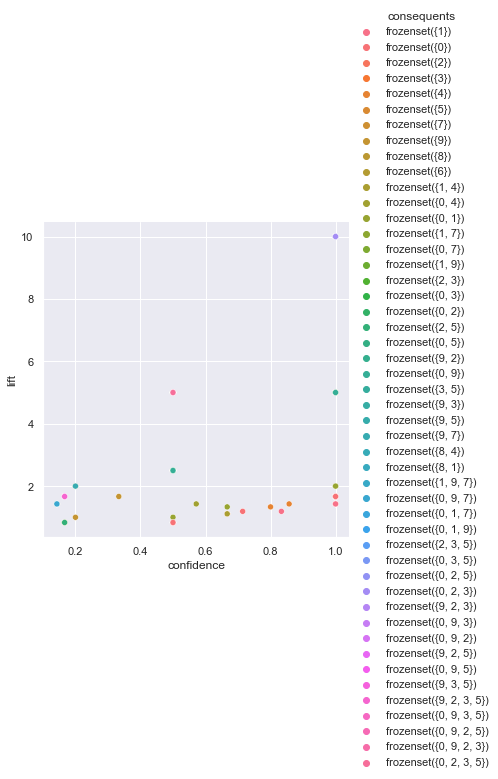

In [42]:
sns.set(style="darkgrid")            
sns.relplot(x="confidence", y="lift",hue='consequents', data=data)

<AxesSubplot:xlabel='confidence', ylabel='lift'>

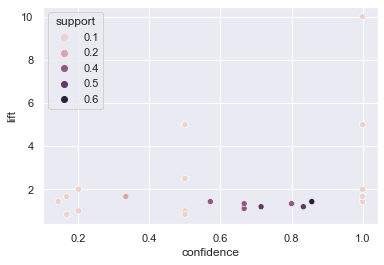

In [43]:
sns.scatterplot(x='confidence',y='lift',hue='support',data=data)

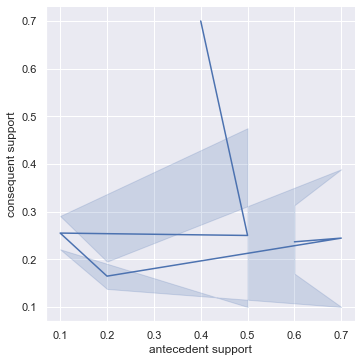

In [44]:
g = sns.relplot(x="antecedent support", y="consequent support", kind="line",sort=False, data=data)



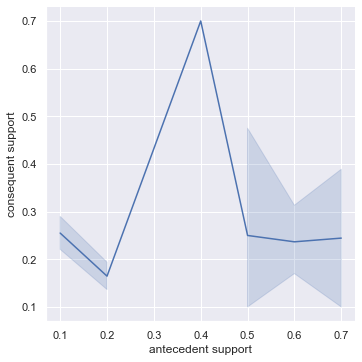

In [45]:
g = sns.relplot(x="antecedent support", y="consequent support", kind="line", data=data)


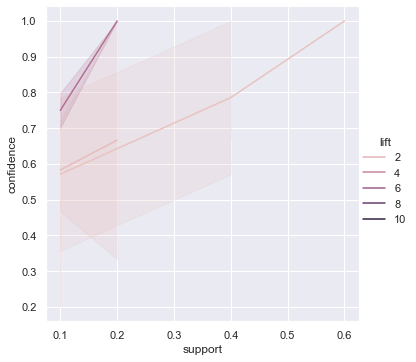

In [46]:
g = sns.relplot(x="support", y="confidence",hue='lift', kind="line", data=data)


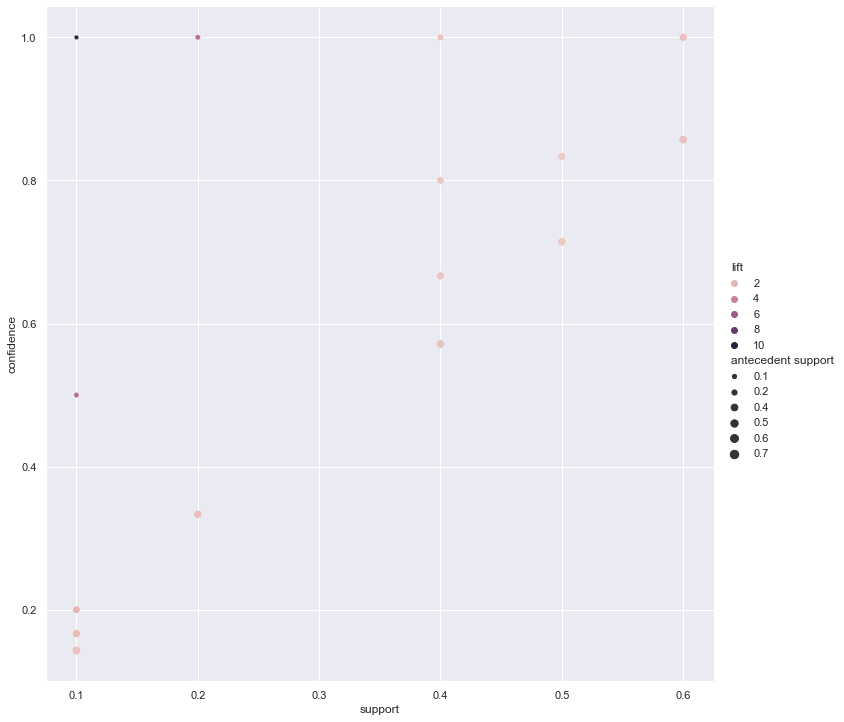

In [47]:
sns.relplot(x='support',y='confidence',hue='lift',size='antecedent support',height=10,data=data)

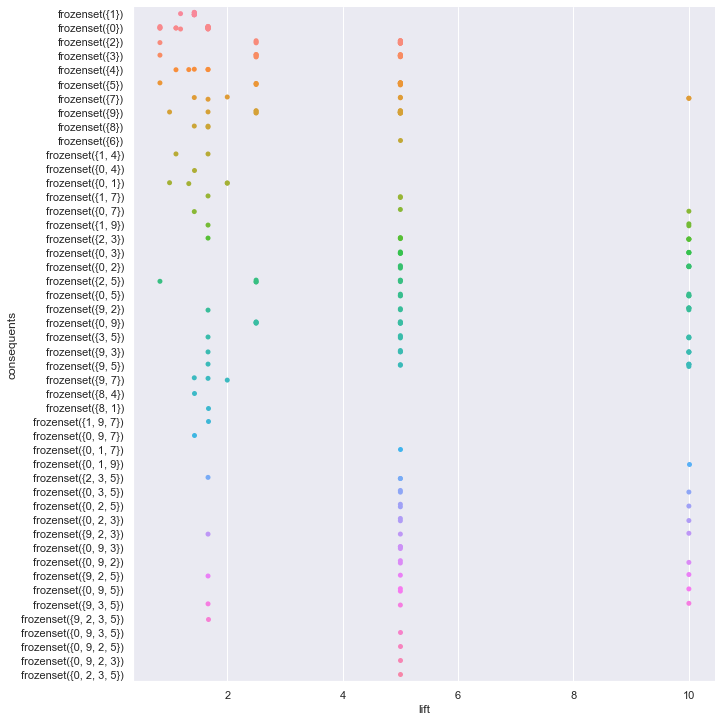

In [48]:
sns.catplot(x="lift",y="consequents",height=10,data=data)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be plac

<AxesSubplot:xlabel='lift', ylabel='consequents'>

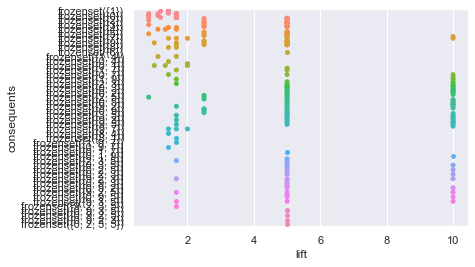

In [49]:
sns.swarmplot(x="lift",y="consequents", data=data)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be plac

<AxesSubplot:xlabel='confidence', ylabel='consequents'>

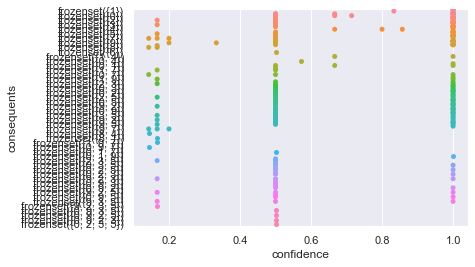

In [50]:
sns.swarmplot(x="confidence",y="consequents" ,data=data)

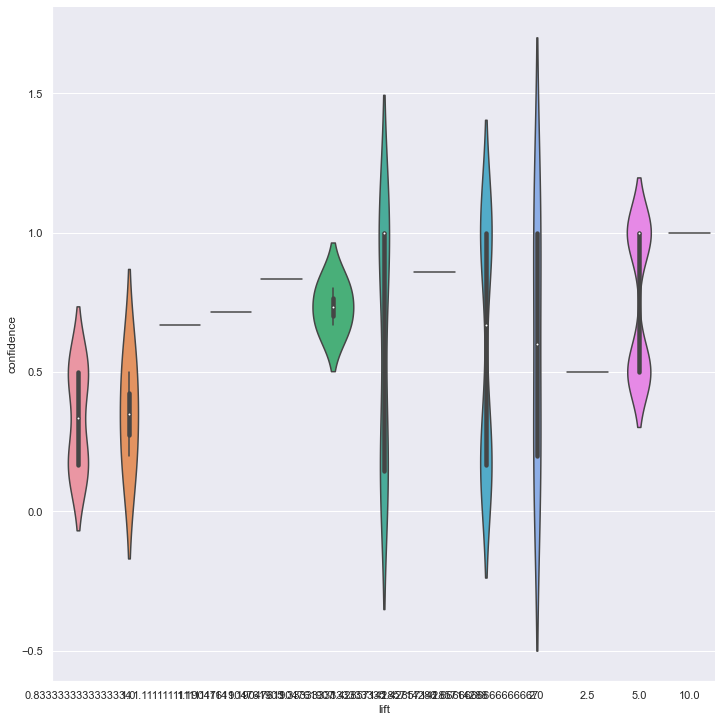

In [51]:
sns.catplot(x="lift",y="confidence",kind='violin',height=10,data=data)

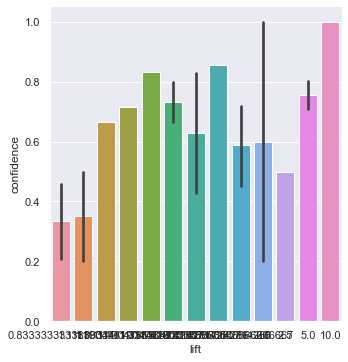

In [52]:
sns.catplot(x="lift",y="confidence",kind= 'bar',data=data)

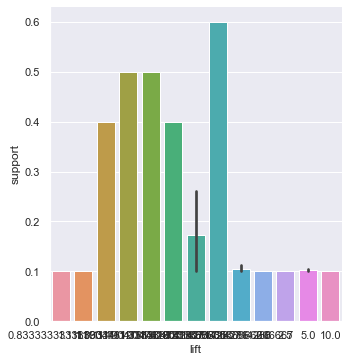

In [53]:
sns.catplot(x="lift",y="support",kind= 'bar',data=data)

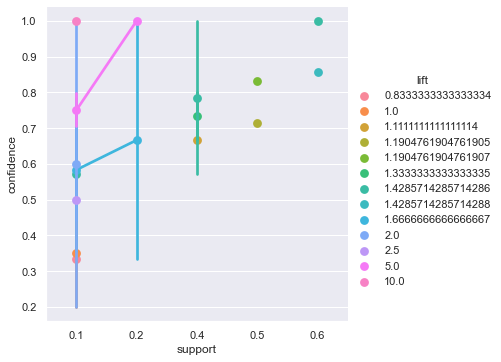

In [54]:
sns.catplot(x='support',y='confidence',hue='lift',kind='point',data=data)

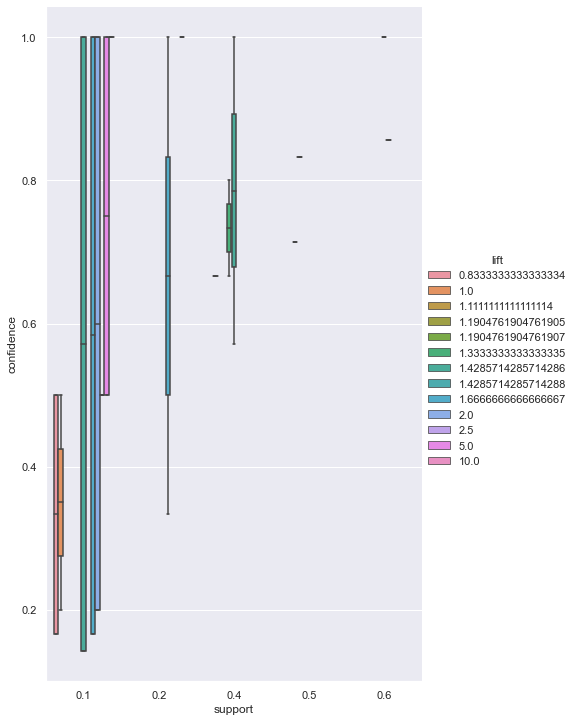

In [55]:
sns.catplot(x="support", y="confidence", hue="lift",
          aspect=.6,height=10,
            kind="box", data=data);